<a href="https://www.kaggle.com/code/eavprog/abscur-pred-one-one?scriptVersionId=150357186" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Прогнозирование абсолютного курса одной валюты с использованием всех имеющихся

# Загрузка библиотек

In [1]:
!pip install fedot==0.6.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.9/493.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 60.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 43.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 3.4 MB/s eta 0:00:00
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15079 sha256=64db7d78075f3d8ab11e329cf08cd1cb0fccf2aeac38972e32700be606a16055
  Stored in directory: /root

In [2]:
# Plots
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

import warnings
warnings.filterwarnings('ignore')

# Prerocessing for FEDOT
from fedot.core.data.data import InputData
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import Task, TaskTypesEnum, TsForecastingParams

from fedot.core.data.data_split import train_test_data_setup
from fedot.core.data.multi_modal import MultiModalData

# FEDOT 
from fedot.core.pipelines.pipeline import Pipeline
from fedot.api.main import Fedot

import logging
logging.raiseExceptions = False

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random

import time
import pickle

# Импорт данных

In [4]:
abscur_data = pd.read_csv('/kaggle/input/abscur-data/abscur.csv',index_col='Date')
abscur_data

,AUD,HKD,JPY,SEK,USD,CAD,CHF,EUR,CNY,CZK,...,PKR,PLN,QAR,RON,SAR,THB,TRY,TWD,UAH,VND
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-24,12.154815,1.818299,0.119224,1.896476,14.111513,12.503570,14.595327,17.552798,2.297646,0.636795,...,0.139098,4.183668,3.878387,3.958349,3.761565,0.429967,6.330304,0.455577,0.936988,0.000663
2014-11-25,12.037477,1.818065,0.119598,1.900750,14.109053,12.529691,14.629768,17.601829,2.299551,0.638593,...,0.138732,4.217071,3.877925,3.974269,3.761010,0.430154,6.358866,0.456131,0.940165,0.000660
2014-11-26,12.040609,1.817337,0.119850,1.906853,14.100399,12.530333,14.667029,17.635496,2.297092,0.639780,...,0.138647,4.221297,3.876185,3.994674,3.757802,0.430678,6.381426,0.456397,0.941722,0.000660
2014-11-27,12.052516,1.823179,0.119925,1.902352,14.137757,12.468140,14.658480,17.619764,2.302454,0.638452,...,0.139014,4.217205,3.886562,3.988646,3.767758,0.431424,6.408775,0.457607,0.944217,0.000661
2014-11-28,12.061558,1.827383,0.119379,1.906739,14.183811,12.418098,14.693947,17.662822,2.309000,0.639926,...,0.139673,4.237135,3.899222,4.001639,3.779527,0.432038,6.389680,0.457838,0.947546,0.000666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-06,13.969715,2.753982,0.143380,1.968869,21.583221,15.707919,23.941402,23.063403,2.965060,0.939731,...,0.075864,5.206673,5.929456,4.654867,5.753531,0.608149,0.759352,0.666005,0.590189,0.000888
2023-11-07,13.891133,2.759455,0.143397,1.971588,21.614762,15.666988,23.969751,23.077499,2.967253,0.938983,...,0.075447,5.214282,5.938121,4.661669,5.765013,0.608524,0.759468,0.666978,0.591052,0.000888
2023-11-08,13.843752,2.764724,0.143035,1.975637,21.652647,15.670293,24.016156,23.110698,2.970614,0.940424,...,0.075587,5.223421,5.948529,4.669840,5.775425,0.610088,0.761551,0.668147,0.592088,0.000888


# Загрузка истории

In [5]:
!cp -r /kaggle/input/abscur-pred-one-one/*.png .

In [6]:
try:
    with open("/kaggle/input/abscur-pred-one-one/history.pickle", "rb") as file:
        history = pickle.load(file)
except:
    history = []
# history

# Цикл


======================================== KRW ========================================
2023-11-12 07:50:32,347 - Unknown integration target: 
2023-11-12 07:50:40,043 - Unknown integration target: 
2023-11-12 07:50:48,004 - Unknown integration target: 
2023-11-12 07:50:55,515 - Unknown integration target: 
2023-11-12 07:51:03,163 - Unknown integration target: 
2023-11-12 07:51:20,069 - Unknown integration target: 
2023-11-12 07:51:36,941 - Unknown integration target: 
2023-11-12 07:51:53,966 - Unknown integration target: 
2023-11-12 07:51:56,270 - Unknown integration target: 
2023-11-12 07:51:56,275 - Unknown integration target: 
2023-11-12 07:52:05,732 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 261.8 MiB, max: 264.0 MiB
2023-11-12 07:52:05,742 - ApiComposer - Initial pipeline was fitted in 7.0 sec.
2023-11-12 07:52:05,752 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
20

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-12 08:24:50,282 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [32:44<?, ?gen/s]

2023-11-12 08:24:50,314 - ApiComposer - Hyperparameters tuning started with 22 min. timeout


2023-11-12 08:24:58,977 - PipelineTuner - Initial pipeline: {'depth': 5, 'length': 5, 'nodes': [rfr, dtreg, ridge, sparse_lagged, data_source_ts/KRW]}
rfr - {'n_jobs': -1}
dtreg - {}
ridge - {}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False}
data_source_ts/KRW - {} 
Initial metric: 0.000
  0%|          | 101/100000 [20:33<376:16:45, 13.56s/trial, best loss: 8.120347061586053e-05]
2023-11-12 08:47:15,407 - PipelineTuner - Final pipeline: {'depth': 5, 'length': 5, 'nodes': [rfr, dtreg, ridge, sparse_lagged, data_source_ts/KRW]}
rfr - {'n_jobs': -1}
dtreg - {}
ridge - {}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False}
data_source_ts/KRW - {}
2023-11-12 08:47:15,412 - PipelineTuner - Final metric: 0.000
2023-11-12 08:47:15,420 - ApiComposer - Hyperparameters tuning finished
2023-11-12 08:47:15,838 - ApiComposer - Model generation finished
2023-11-12 08:47:24,804 - FEDOT logger - Final 

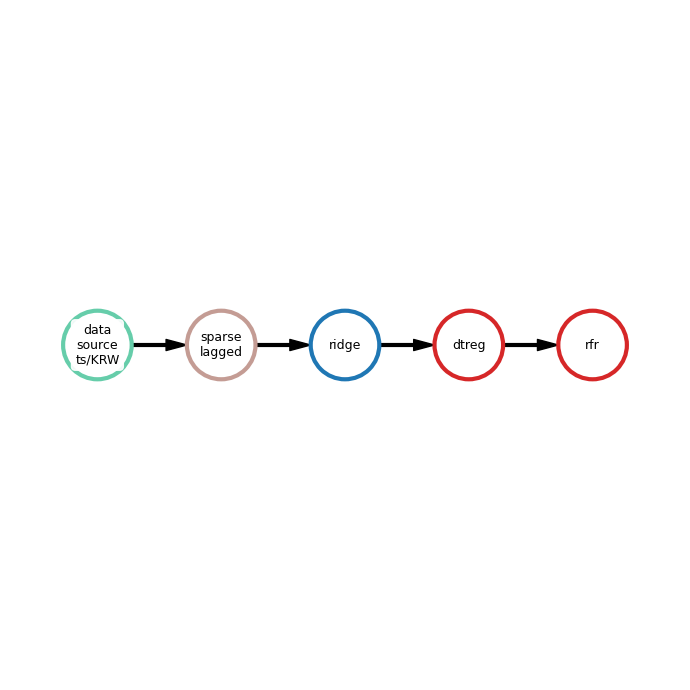

[0.01601057 0.0160121  0.01601304 0.01601332 0.01601288 0.01601209
 0.01601128 0.01601058 0.01600895 0.01600773 0.01600594 0.01600391]
{'mae': 0.0, 'mape': 0.012}


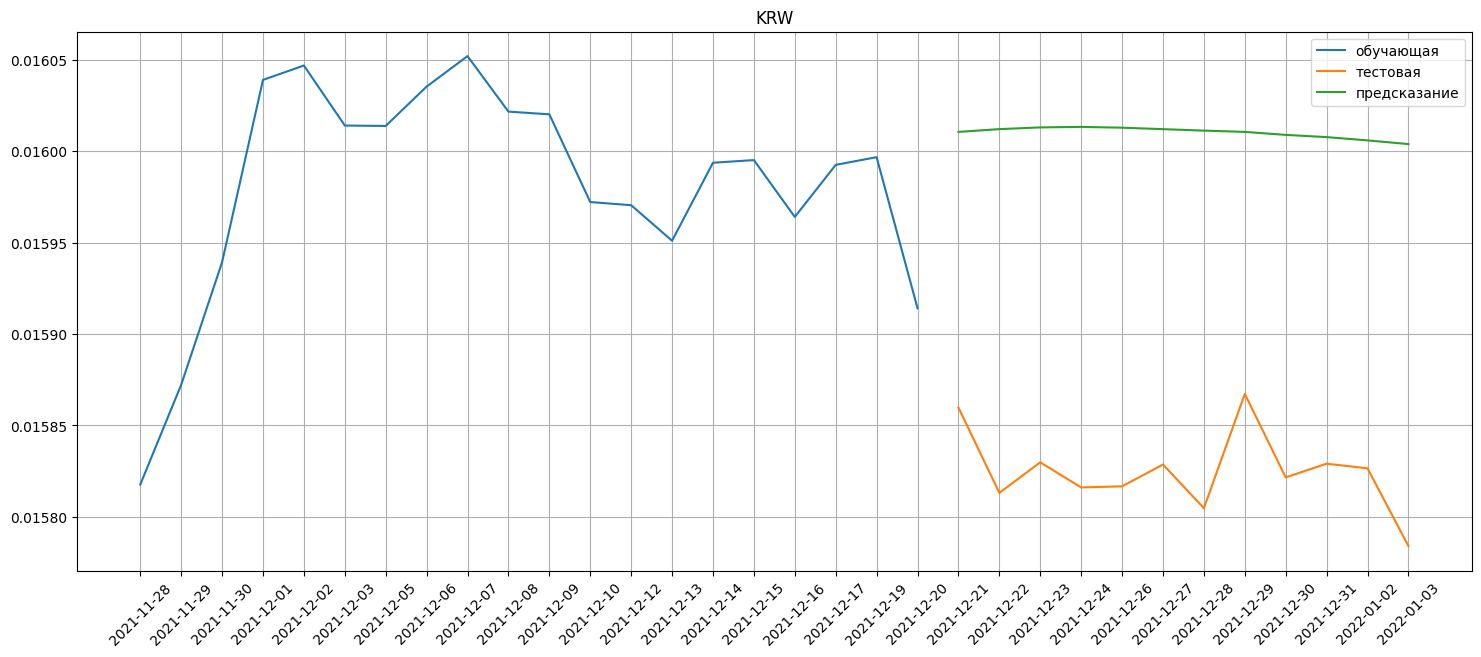


======================================== RUB ========================================
2023-11-12 08:48:20,742 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 2.2 MiB
2023-11-12 08:48:20,751 - ApiComposer - Initial pipeline was fitted in 17.2 sec.
2023-11-12 08:48:20,761 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-12 08:48:20,801 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 48 min. Set of candidate models: ['ar', 'glm', 'cut', 'lagged', 'polyfit', 'ts_naive_average', 'diff_filter', 'arima', 'gaussian_filter', 'locf', 'sparse_lagged', 'clstm', 'smoothing', 'ets', 'stl_arima', 'ar', 'polyfit', 'arima', 'adareg', 'isolation_forest_reg', 'rfr', 'poly_features', 'ridge', 'glm', 'lasso', 'diff_filter', 'gaussian_filter', 'treg', 'dtreg', 'ets', 'lagged', 'gbr', 'ransac_lin_reg', 'clstm', 'normalization', 'locf', 'svr', 'stl_arima'

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-12 09:16:44,379 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [28:23<?, ?gen/s]

2023-11-12 09:16:44,409 - ApiComposer - Hyperparameters tuning started with 19 min. timeout


2023-11-12 09:17:02,621 - PipelineTuner - Initial pipeline: {'depth': 5, 'length': 5, 'nodes': [gbr, rfr, linear, sparse_lagged, data_source_ts/RUB]}
gbr - {}
rfr - {'n_jobs': -1}
linear - {}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False}
data_source_ts/RUB - {} 
Initial metric: 0.009
  0%|          | 41/100000 [14:49<796:38:56, 28.69s/trial, best loss: 0.009256866918458563]
2023-11-12 09:37:05,123 - PipelineTuner - Final pipeline: {'depth': 5, 'length': 5, 'nodes': [gbr, rfr, linear, sparse_lagged, data_source_ts/RUB]}
gbr - {}
rfr - {'n_jobs': -1}
linear - {}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False}
data_source_ts/RUB - {}
2023-11-12 09:37:05,126 - PipelineTuner - Final metric: 0.009
2023-11-12 09:37:05,134 - ApiComposer - Hyperparameters tuning finished
2023-11-12 09:37:05,572 - ApiComposer - Model generation finished
2023-11-12 09:37:22,089 - FEDOT logger - Final pipeli

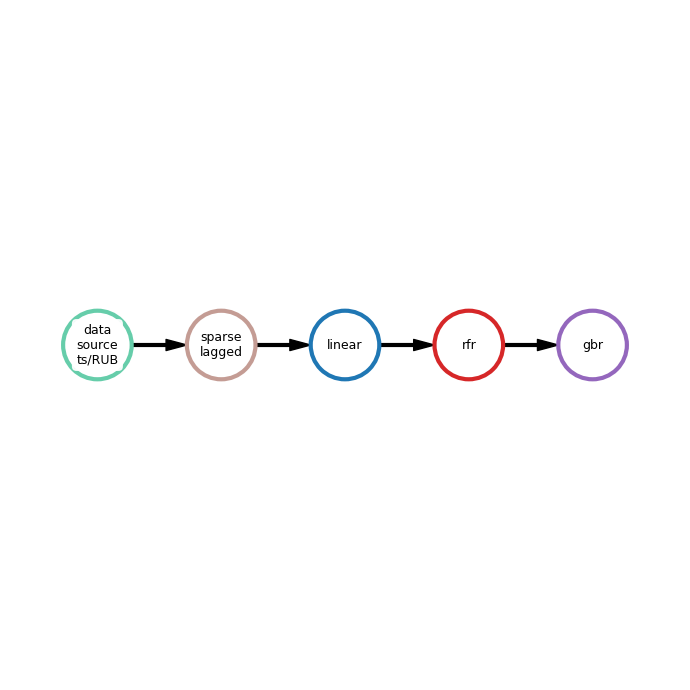

[0.35868778 0.36002428 0.35954902]
{'mae': 0.008, 'mape': 0.021}


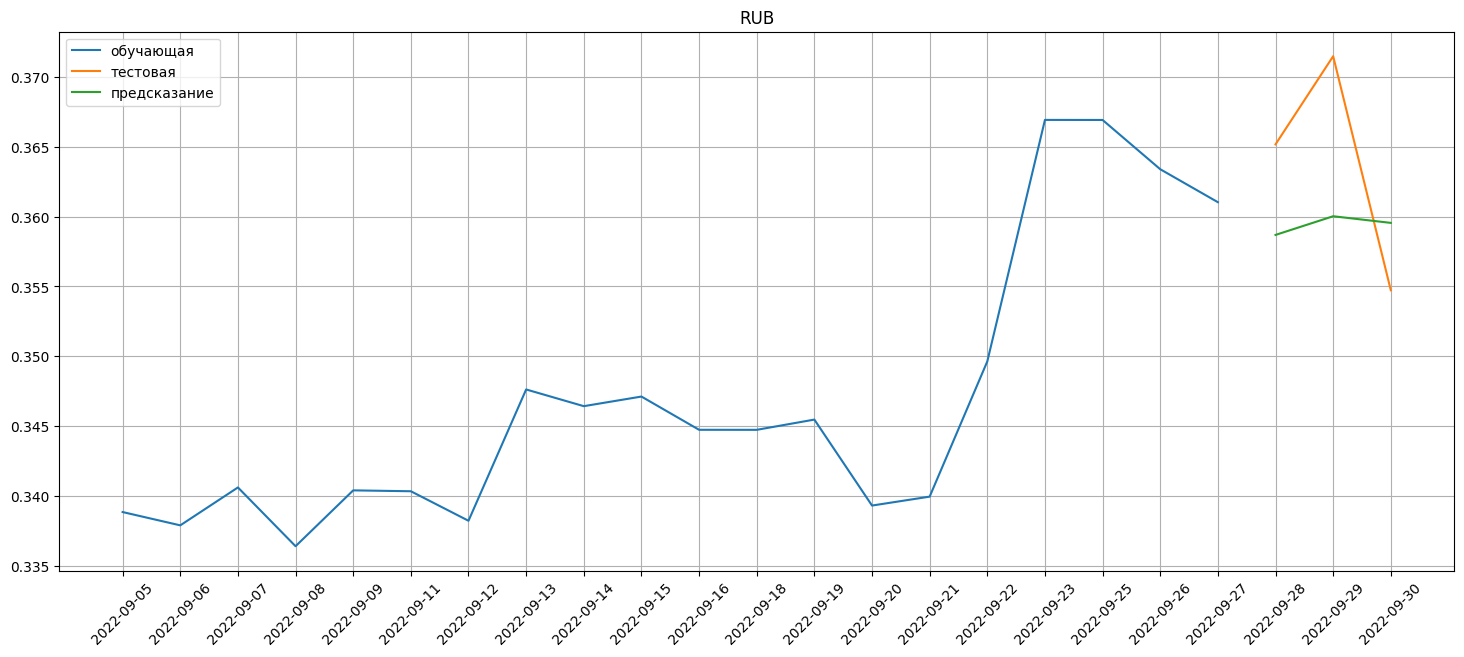


======================================== SGD ========================================
2023-11-12 09:38:59,541 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 3.8 MiB
2023-11-12 09:38:59,548 - ApiComposer - Initial pipeline was fitted in 20.7 sec.
2023-11-12 09:38:59,552 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-12 09:38:59,585 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 43 min. Set of candidate models: ['ar', 'glm', 'cut', 'lagged', 'polyfit', 'ts_naive_average', 'diff_filter', 'arima', 'gaussian_filter', 'locf', 'sparse_lagged', 'clstm', 'smoothing', 'ets', 'stl_arima', 'ar', 'polyfit', 'arima', 'adareg', 'isolation_forest_reg', 'rfr', 'poly_features', 'ridge', 'glm', 'lasso', 'diff_filter', 'gaussian_filter', 'treg', 'dtreg', 'ets', 'lagged', 'gbr', 'ransac_lin_reg', 'clstm', 'normalization', 'locf', 'svr', 'stl_arima'

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-12 10:04:30,644 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [25:31<?, ?gen/s]

2023-11-12 10:04:30,672 - ApiComposer - Hyperparameters tuning started with 17 min. timeout


2023-11-12 10:05:08,563 - PipelineTuner - Initial pipeline: {'depth': 8, 'length': 8, 'nodes': [ridge, ridge, ridge, poly_features, lagged, data_source_ts/SGD, linear, decompose]}
ridge - {}
ridge - {}
ridge - {'alpha': 0.818868719764139}
poly_features - {}
lagged - {'window_size': 10}
data_source_ts/SGD - {}
linear - {}
decompose - {} 
Initial metric: 0.022
  0%|          | 20/100000 [09:25<1570:59:01, 56.57s/trial, best loss: 0.022340100937333657]
2023-11-12 10:22:34,602 - PipelineTuner - Final pipeline: {'depth': 8, 'length': 8, 'nodes': [ridge, ridge, ridge, poly_features, lagged, data_source_ts/SGD, linear, decompose]}
ridge - {}
ridge - {}
ridge - {'alpha': 0.818868719764139}
poly_features - {}
lagged - {'window_size': 10}
data_source_ts/SGD - {}
linear - {}
decompose - {}
2023-11-12 10:22:34,606 - PipelineTuner - Final metric: 0.022
2023-11-12 10:22:34,612 - ApiComposer - Hyperparameters tuning finished
2023-11-12 10:22:35,075 - ApiComposer - Model generation finished
2023-11-12

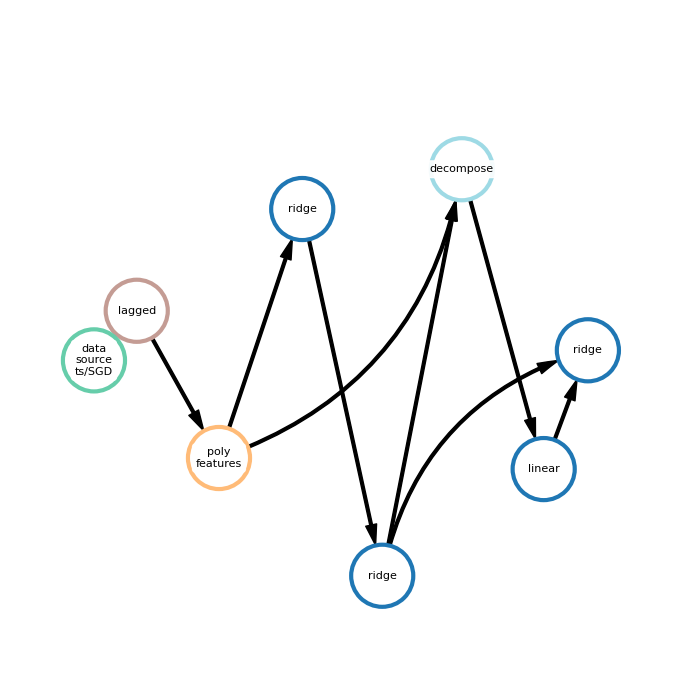

[15.56237109 15.55729579 15.53132197 15.54197823 15.55476207 15.55480414
 15.55134054 15.56131567 15.56707059 15.56554037 15.56751949 15.57568854]
{'mae': 0.022, 'mape': 0.001}


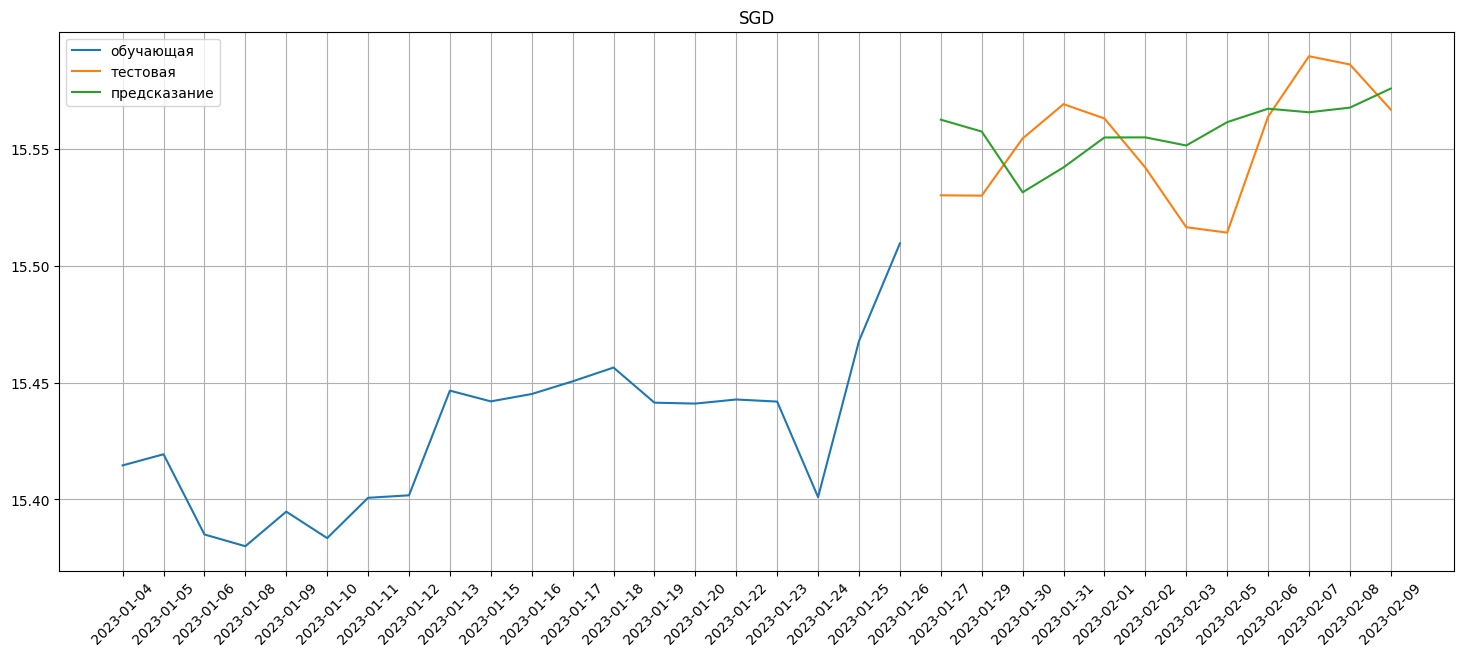


======================================== TWD ========================================
2023-11-12 10:23:47,149 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 3.6 MiB
2023-11-12 10:23:47,160 - ApiComposer - Initial pipeline was fitted in 9.5 sec.
2023-11-12 10:23:47,170 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-12 10:23:47,204 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 10 min. Set of candidate models: ['ar', 'glm', 'cut', 'lagged', 'polyfit', 'ts_naive_average', 'diff_filter', 'arima', 'gaussian_filter', 'locf', 'sparse_lagged', 'clstm', 'smoothing', 'ets', 'stl_arima', 'ar', 'polyfit', 'arima', 'adareg', 'isolation_forest_reg', 'rfr', 'poly_features', 'ridge', 'glm', 'lasso', 'diff_filter', 'gaussian_filter', 'treg', 'dtreg', 'ets', 'lagged', 'gbr', 'ransac_lin_reg', 'clstm', 'normalization', 'locf', 'svr', 'stl_arima',

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-12 10:29:53,180 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [06:05<?, ?gen/s]

2023-11-12 10:29:53,212 - ApiComposer - Hyperparameters tuning started with 4 min. timeout


2023-11-12 10:30:31,571 - PipelineTuner - Initial pipeline: {'depth': 8, 'length': 9, 'nodes': [rfr, ridge, ridge, glm, data_source_ts/TWD, ridge, lagged, linear, decompose]}
rfr - {'n_jobs': -1}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/TWD - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {} 
Initial metric: 0.004
 70%|███████   | 7/10 [04:14<01:49, 36.37s/trial, best loss: 0.0035675889155129216]
2023-11-12 10:34:46,196 - PipelineTuner - Tuner stopped after initial search due to the lack of time
2023-11-12 10:35:20,362 - PipelineTuner - Final pipeline: {'depth': 8, 'length': 9, 'nodes': [rfr, ridge, ridge, glm, data_source_ts/TWD, ridge, lagged, linear, decompose]}
rfr - {'n_jobs': -1, 'bootstrap': True, 'max_features': 0.7680707214069289, 'min_samples_leaf': 12, 'min_samples_split': 10}
ridge - {'alpha': 6.658388216021995}
ridge - {'alpha': 3.0737577366208013}
glm - {'family': 'inverse_gaussian', 'link': 'identity'}
data

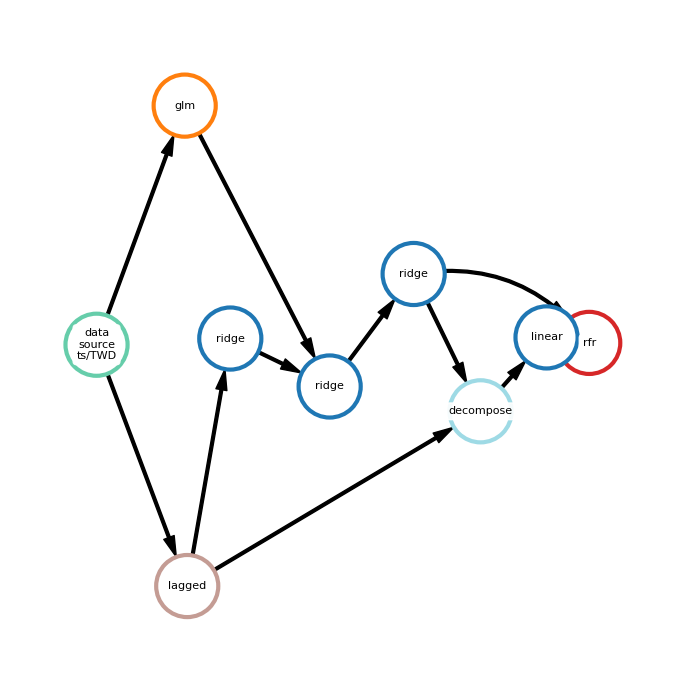

[0.63933148 0.6392572  0.63965559 0.63974256 0.63984147 0.64021775
 0.64012836 0.64014314 0.64008645 0.64015799 0.64018597 0.64011298
 0.6398592  0.6396332  0.63928466]
{'mae': 0.007, 'mape': 0.011}


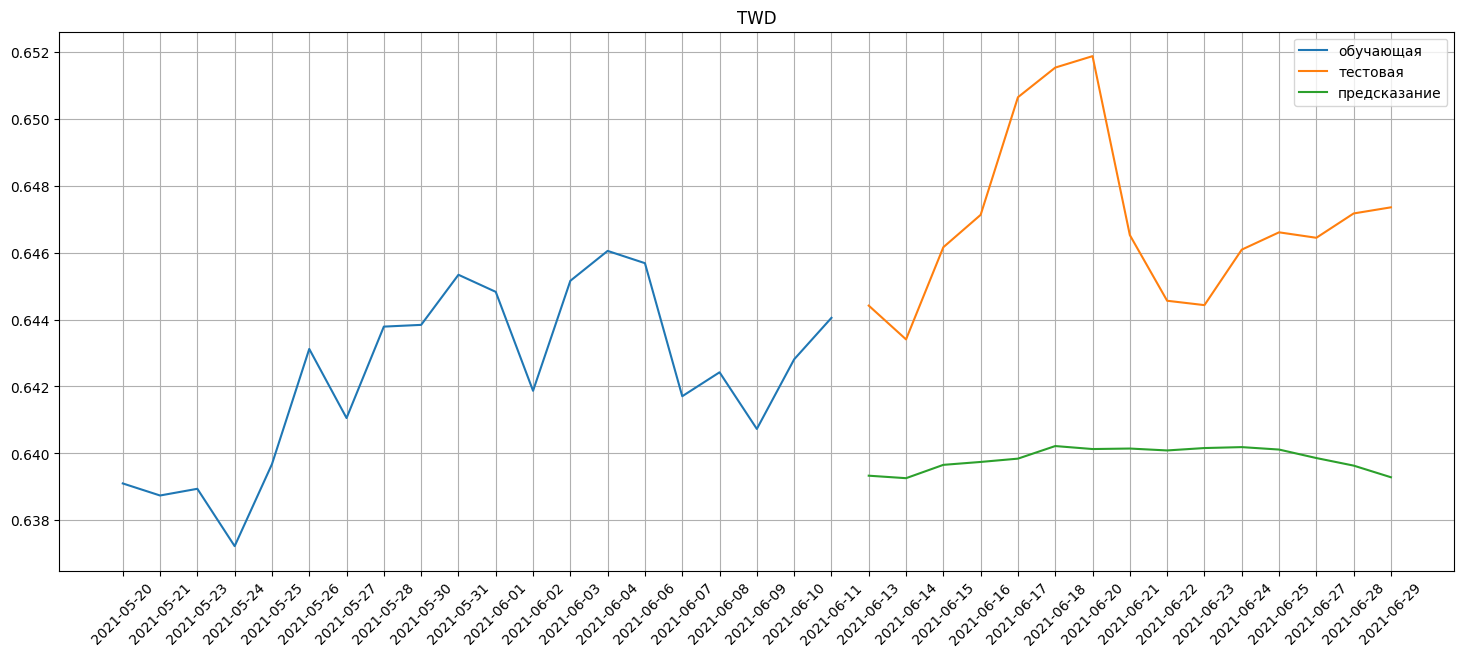


======================================== BRL ========================================
2023-11-12 10:36:13,595 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 5.1 MiB
2023-11-12 10:36:13,609 - ApiComposer - Initial pipeline was fitted in 16.1 sec.
2023-11-12 10:36:13,618 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-12 10:36:13,647 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 51 min. Set of candidate models: ['ar', 'glm', 'cut', 'lagged', 'polyfit', 'ts_naive_average', 'diff_filter', 'arima', 'gaussian_filter', 'locf', 'sparse_lagged', 'clstm', 'smoothing', 'ets', 'stl_arima', 'ar', 'polyfit', 'arima', 'adareg', 'isolation_forest_reg', 'rfr', 'poly_features', 'ridge', 'glm', 'lasso', 'diff_filter', 'gaussian_filter', 'treg', 'dtreg', 'ets', 'lagged', 'gbr', 'ransac_lin_reg', 'clstm', 'normalization', 'locf', 'svr', 'stl_arima'

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-12 11:07:47,454 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [31:33<?, ?gen/s]

2023-11-12 11:07:47,481 - ApiComposer - Hyperparameters tuning started with 19 min. timeout


2023-11-12 11:08:27,694 - PipelineTuner - Initial pipeline: {'depth': 6, 'length': 7, 'nodes': [ridge, ridge, adareg, glm, data_source_ts/BRL, ridge, sparse_lagged]}
ridge - {}
ridge - {'alpha': 0.7739752675357354}
adareg - {}
glm - {'family': 'inverse_gaussian', 'link': 'inverse_power'}
data_source_ts/BRL - {}
ridge - {}
sparse_lagged - {'window_size': 12.839406365451083, 'n_components': 0.11066912552026031, 'sparse_transform': True, 'use_svd': True} 
Initial metric: 0.060
  0%|          | 20/100000 [10:00<1666:55:22, 60.02s/trial, best loss: 0.0538518257258944]
2023-11-12 11:28:24,471 - PipelineTuner - Final pipeline: {'depth': 6, 'length': 7, 'nodes': [ridge, ridge, adareg, glm, data_source_ts/BRL, ridge, sparse_lagged]}
ridge - {'alpha': 0.20998912304562767}
ridge - {'alpha': 0.37941357451818514}
adareg - {'learning_rate': 0.11328789743202541, 'loss': 'exponential'}
glm - {'family': 'gaussian', 'link': 'inverse_power'}
data_source_ts/BRL - {}
ridge - {'alpha': 2.8246440094670895}
s

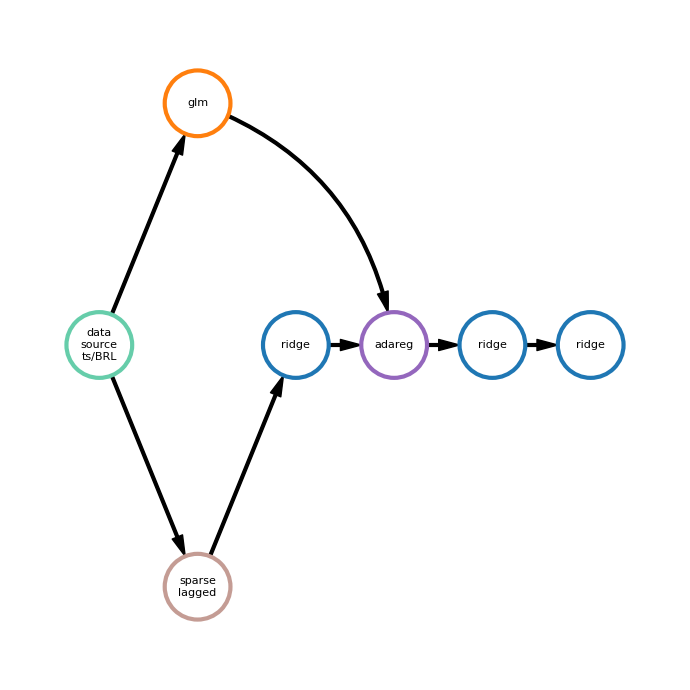

[3.93674225 3.93702727 3.93796945 3.93874956 3.93957472 3.93994404
 3.94010421 3.94009305 3.9401012  3.94028089 3.94039079 3.94035066
 3.94031863 3.94051039 3.94084805 3.94114045 3.94136361 3.94140502
 3.94158054 3.9414767 ]
{'mae': 0.055, 'mape': 0.014}


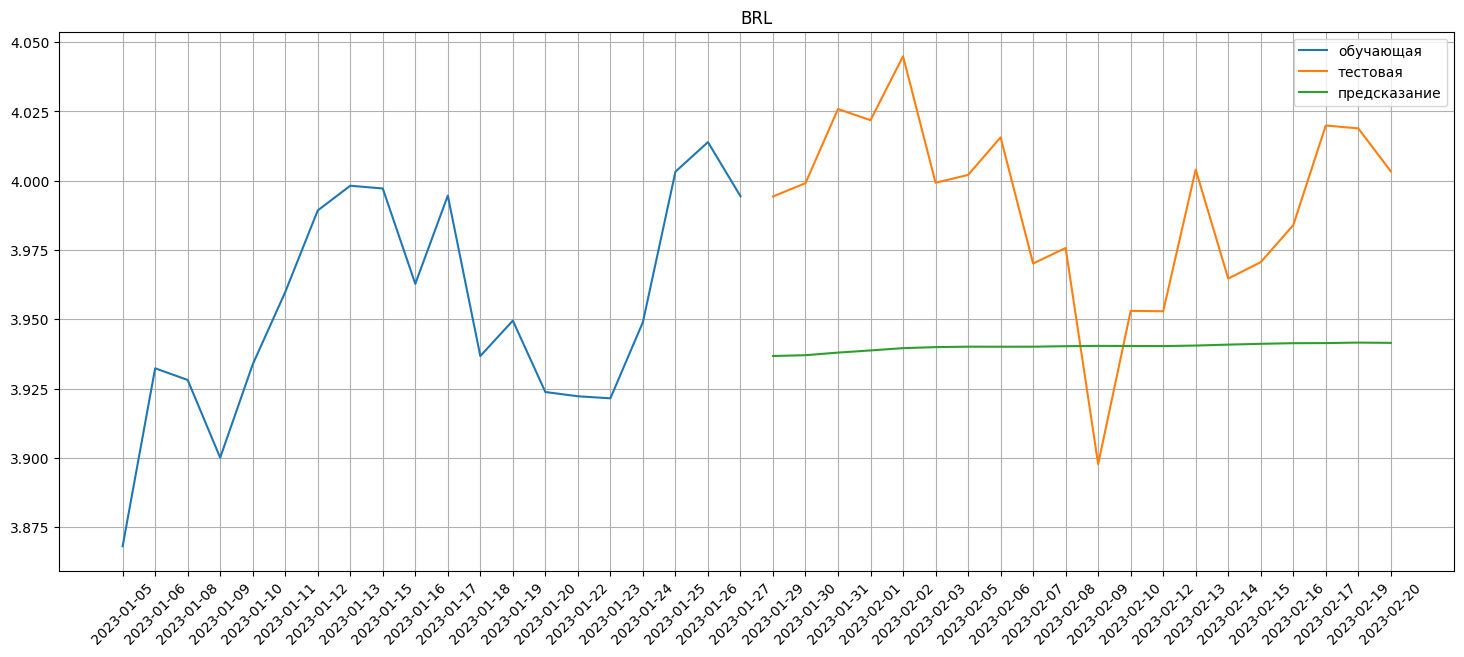


======================================== PEN ========================================
2023-11-12 11:29:51,798 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 2.1 MiB
2023-11-12 11:29:51,802 - ApiComposer - Initial pipeline was fitted in 13.5 sec.
2023-11-12 11:29:51,806 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-12 11:29:51,831 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 50 min. Set of candidate models: ['ar', 'glm', 'cut', 'lagged', 'polyfit', 'ts_naive_average', 'diff_filter', 'arima', 'gaussian_filter', 'locf', 'sparse_lagged', 'clstm', 'smoothing', 'ets', 'stl_arima', 'ar', 'polyfit', 'arima', 'adareg', 'isolation_forest_reg', 'rfr', 'poly_features', 'ridge', 'glm', 'lasso', 'diff_filter', 'gaussian_filter', 'treg', 'dtreg', 'ets', 'lagged', 'gbr', 'ransac_lin_reg', 'clstm', 'normalization', 'locf', 'svr', 'stl_arima'

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-12 11:53:17,579 - GroupedCondition - Optimisation finished: Early stopping timeout criteria was satisfied


Generations:   0%|          | 1/10000 [23:25<?, ?gen/s]

2023-11-12 11:53:17,601 - ApiComposer - Hyperparameters tuning started with 26 min. timeout


2023-11-12 11:53:27,631 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, sparse_lagged, data_source_ts/PEN]}
ridge - {'alpha': 5.279469899524468}
sparse_lagged - {'window_size': 8.87345741427869, 'n_components': 0.004827246002667429, 'sparse_transform': True, 'use_svd': True}
data_source_ts/PEN - {} 
Initial metric: 0.055
  0%|          | 88/100000 [26:19<503:46:30, 18.15s/trial, best loss: 0.05401931481692585]
2023-11-12 12:20:11,136 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, sparse_lagged, data_source_ts/PEN]}
ridge - {'alpha': 5.578745861376001}
sparse_lagged - {'window_size': 44, 'n_components': 0.015587503811787223, 'sparse_transform': True, 'use_svd': False}
data_source_ts/PEN - {}
2023-11-12 12:20:11,140 - PipelineTuner - Final metric: 0.054
2023-11-12 12:20:11,146 - ApiComposer - Hyperparameters tuning finished
2023-11-12 12:20:11,570 - ApiComposer - Model generation finished
2023-11-12 12:20:23,712 - FEDOT logger 

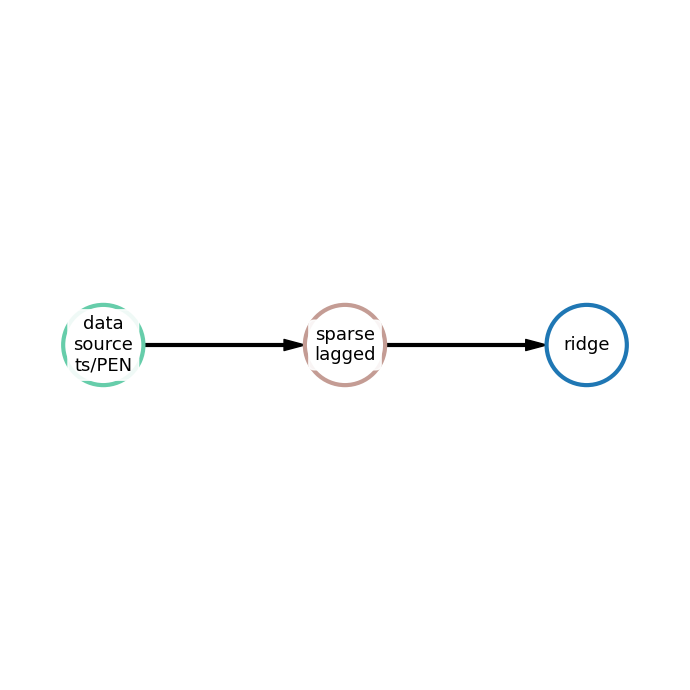

[5.25538488 5.25476912 5.25405217]
{'mae': 0.027, 'mape': 0.005}


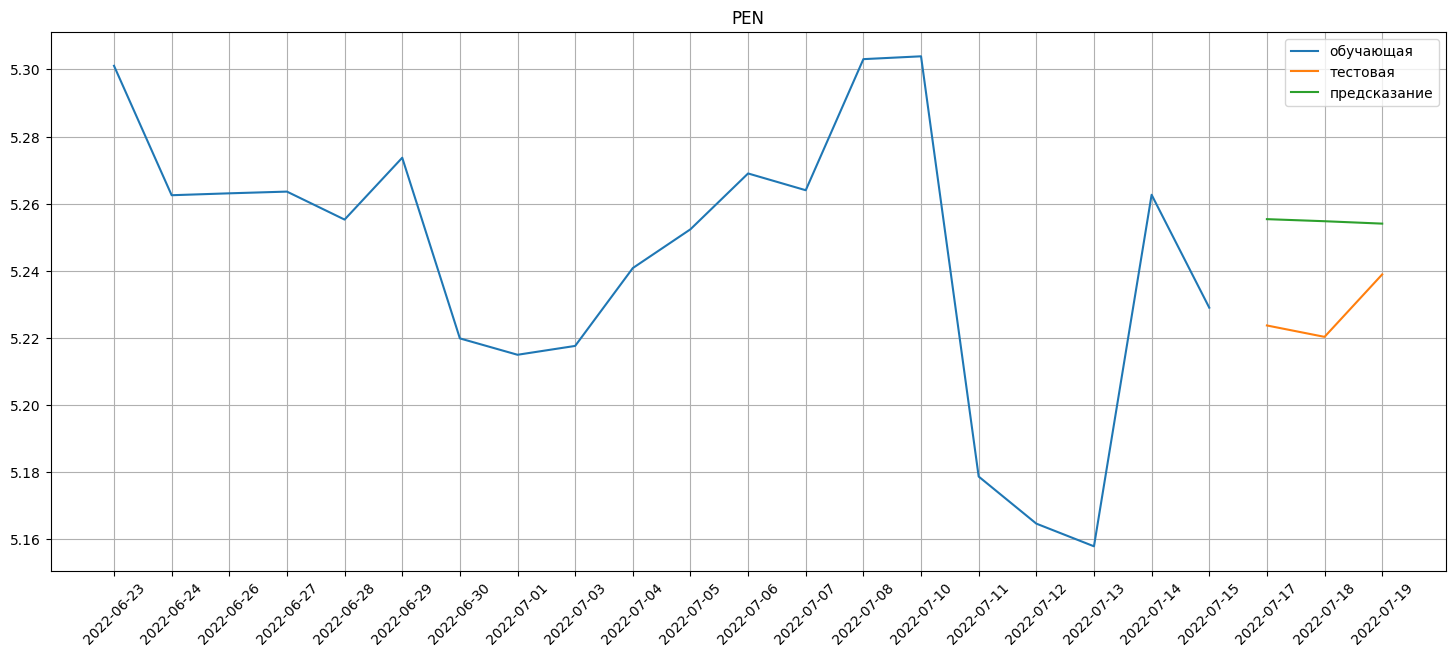


======================================== TRY ========================================
2023-11-12 12:20:51,452 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 4.4 MiB
2023-11-12 12:20:51,458 - ApiComposer - Initial pipeline was fitted in 15.6 sec.
2023-11-12 12:20:51,463 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-12 12:20:51,496 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 35 min. Set of candidate models: ['ar', 'glm', 'cut', 'lagged', 'polyfit', 'ts_naive_average', 'diff_filter', 'arima', 'gaussian_filter', 'locf', 'sparse_lagged', 'clstm', 'smoothing', 'ets', 'stl_arima', 'ar', 'polyfit', 'arima', 'adareg', 'isolation_forest_reg', 'rfr', 'poly_features', 'ridge', 'glm', 'lasso', 'diff_filter', 'gaussian_filter', 'treg', 'dtreg', 'ets', 'lagged', 'gbr', 'ransac_lin_reg', 'clstm', 'normalization', 'locf', 'svr', 'stl_arima'

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-12 12:41:14,344 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [20:22<?, ?gen/s]

2023-11-12 12:41:14,369 - ApiComposer - Hyperparameters tuning started with 14 min. timeout


2023-11-12 12:41:24,708 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, sparse_lagged, data_source_ts/TRY]}
ridge - {'alpha': 1.049741136910698}
sparse_lagged - {'window_size': 9.459372906503084, 'n_components': 0.19811809617109205, 'sparse_transform': True, 'use_svd': False}
data_source_ts/TRY - {} 
Initial metric: 0.007
  0%|          | 39/100000 [14:12<622:44:42, 22.43s/trial, best loss: 0.006579550554640054]
2023-11-12 12:56:03,331 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, sparse_lagged, data_source_ts/TRY]}
ridge - {'alpha': 1.049741136910698}
sparse_lagged - {'window_size': 9.459372906503084, 'n_components': 0.19811809617109205, 'sparse_transform': True, 'use_svd': False}
data_source_ts/TRY - {}
2023-11-12 12:56:03,335 - PipelineTuner - Final metric: 0.007
2023-11-12 12:56:03,339 - ApiComposer - Hyperparameters tuning finished
2023-11-12 12:56:03,786 - ApiComposer - Model generation finished
2023-11-12 12:56:17,574

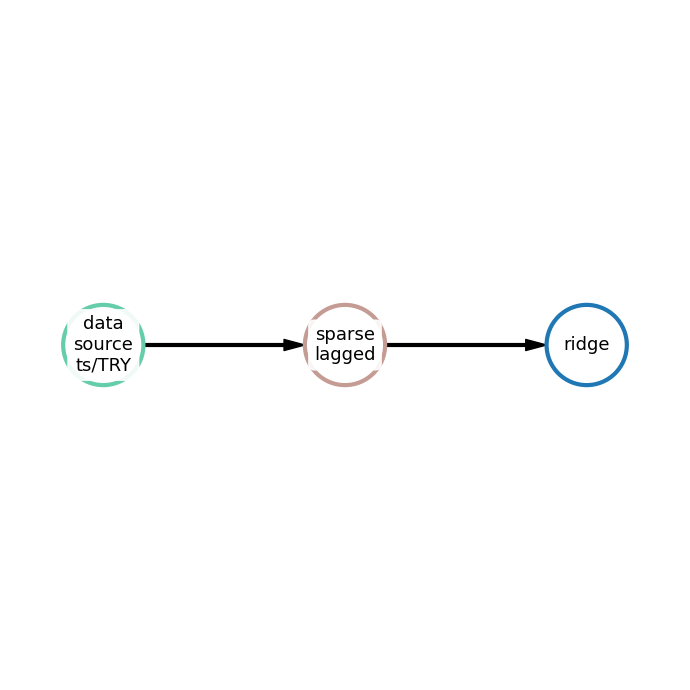

[1.09843871 1.09728204 1.09584967 1.09460132 1.09329382 1.09193214
 1.09049108 1.08909562 1.08775777 1.08657883 1.08490175 1.08358553
 1.08231254 1.08104625 1.07968429 1.07831691]
{'mae': 0.015, 'mape': 0.014}


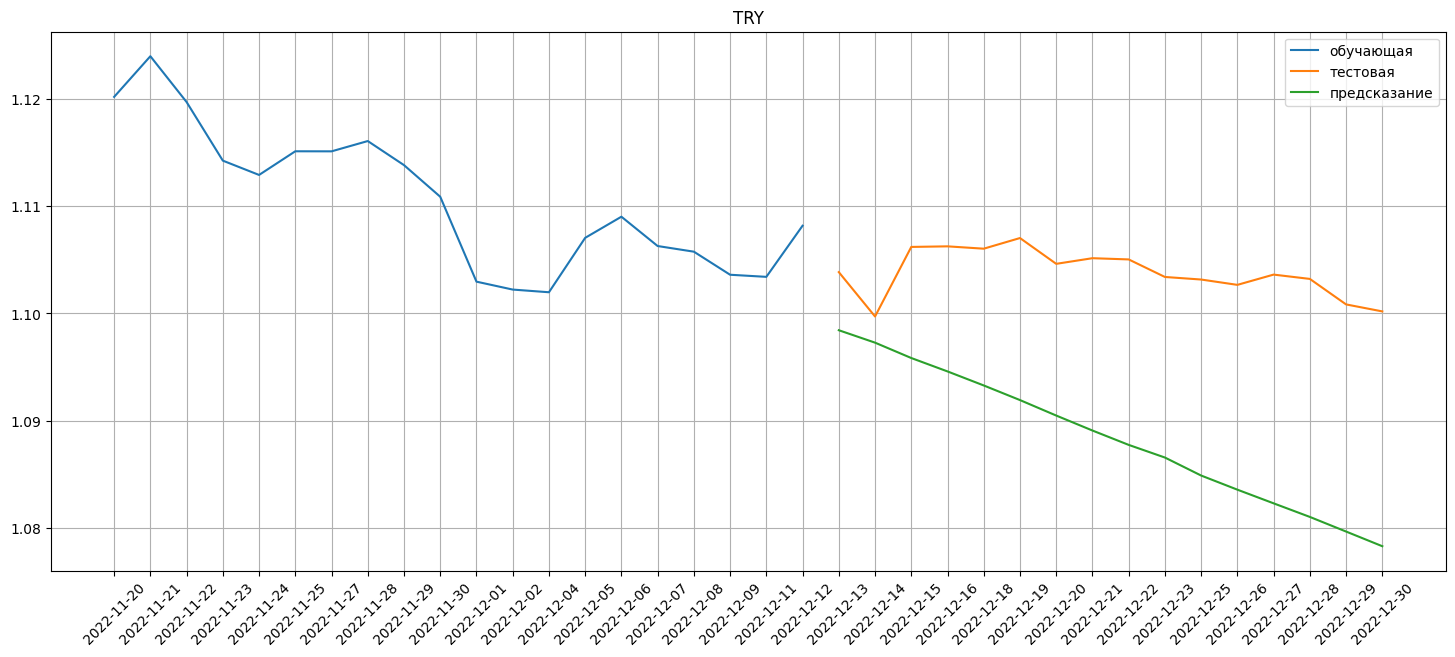


======================================== KZT ========================================
2023-11-12 12:56:48,103 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 3.4 MiB
2023-11-12 12:56:48,130 - ApiComposer - Initial pipeline was fitted in 10.7 sec.
2023-11-12 12:56:48,136 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-12 12:56:48,163 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 12 min. Set of candidate models: ['ar', 'glm', 'cut', 'lagged', 'polyfit', 'ts_naive_average', 'diff_filter', 'arima', 'gaussian_filter', 'locf', 'sparse_lagged', 'clstm', 'smoothing', 'ets', 'stl_arima', 'ar', 'polyfit', 'arima', 'adareg', 'isolation_forest_reg', 'rfr', 'poly_features', 'ridge', 'glm', 'lasso', 'diff_filter', 'gaussian_filter', 'treg', 'dtreg', 'ets', 'lagged', 'gbr', 'ransac_lin_reg', 'clstm', 'normalization', 'locf', 'svr', 'stl_arima'

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-12 13:03:31,611 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [06:43<?, ?gen/s]

2023-11-12 13:03:31,640 - ApiComposer - Hyperparameters tuning started with 5 min. timeout


2023-11-12 13:04:07,279 - PipelineTuner - Initial pipeline: {'depth': 8, 'length': 9, 'nodes': [linear, ridge, ridge, arima, data_source_ts/KZT, ridge, sparse_lagged, linear, decompose]}
linear - {}
ridge - {}
ridge - {}
arima - {'p': 2, 'd': 0, 'q': 2}
data_source_ts/KZT - {}
ridge - {}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False}
linear - {}
decompose - {} 
Initial metric: 0.000
 90%|█████████ | 9/10 [05:26<00:36, 36.31s/trial, best loss: 9.173870378618487e-05]
2023-11-12 13:09:34,094 - PipelineTuner - Tuner stopped after initial search due to the lack of time
2023-11-12 13:10:06,897 - PipelineTuner - Final pipeline: {'depth': 8, 'length': 9, 'nodes': [linear, ridge, ridge, arima, data_source_ts/KZT, ridge, sparse_lagged, linear, decompose]}
linear - {}
ridge - {'alpha': 3.998060024249764}
ridge - {'alpha': 1.535862033699755}
arima - {'p': 2, 'd': 0, 'q': 2}
data_source_ts/KZT - {}
ridge - {'alpha': 0.4026842040977825}
sparse_la

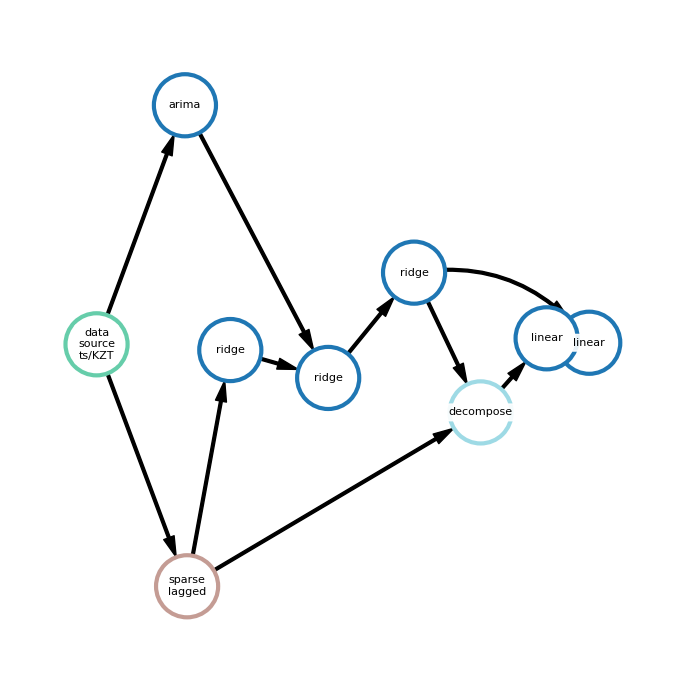

[0.04294634 0.04295781 0.04293871 0.04294443 0.04291964 0.04300177
 0.04290819 0.04297484 0.04298808 0.04297082 0.04294223 0.04297849
 0.04301247]
{'mae': 0.0, 'mape': 0.006}


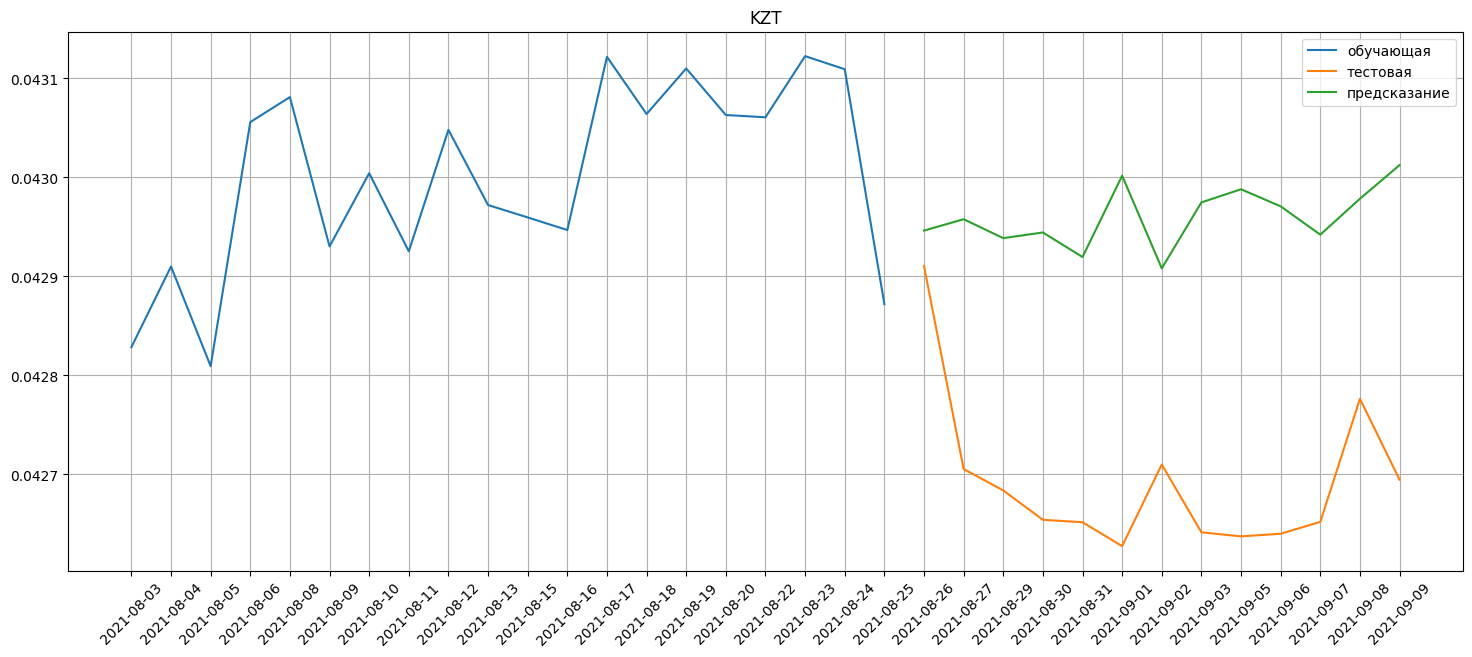


======================================== NOK ========================================
2023-11-12 13:11:09,478 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 4.4 MiB
2023-11-12 13:11:09,485 - ApiComposer - Initial pipeline was fitted in 15.7 sec.
2023-11-12 13:11:09,491 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-12 13:11:09,528 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 44 min. Set of candidate models: ['ar', 'glm', 'cut', 'lagged', 'polyfit', 'ts_naive_average', 'diff_filter', 'arima', 'gaussian_filter', 'locf', 'sparse_lagged', 'clstm', 'smoothing', 'ets', 'stl_arima', 'ar', 'polyfit', 'arima', 'adareg', 'isolation_forest_reg', 'rfr', 'poly_features', 'ridge', 'glm', 'lasso', 'diff_filter', 'gaussian_filter', 'treg', 'dtreg', 'ets', 'lagged', 'gbr', 'ransac_lin_reg', 'clstm', 'normalization', 'locf', 'svr', 'stl_arima'

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-12 13:36:50,102 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [25:40<?, ?gen/s]

2023-11-12 13:36:50,132 - ApiComposer - Hyperparameters tuning started with 18 min. timeout


2023-11-12 13:37:01,059 - PipelineTuner - Initial pipeline: {'depth': 4, 'length': 5, 'nodes': [ridge, normalization, glm, data_source_ts/NOK, lagged]}
ridge - {'alpha': 9.799196734842287}
normalization - {}
glm - {'family': 'inverse_gaussian', 'link': 'inverse_power'}
data_source_ts/NOK - {}
lagged - {'window_size': 4.988544077370684} 
Initial metric: 0.018
  0%|          | 67/100000 [16:01<468:13:09, 16.87s/trial, best loss: 0.017961040920420487]
2023-11-12 13:55:14,965 - PipelineTuner - Final pipeline: {'depth': 4, 'length': 5, 'nodes': [ridge, normalization, glm, data_source_ts/NOK, lagged]}
ridge - {'alpha': 9.799196734842287}
normalization - {}
glm - {'family': 'inverse_gaussian', 'link': 'inverse_power'}
data_source_ts/NOK - {}
lagged - {'window_size': 4.988544077370684}
2023-11-12 13:55:14,971 - PipelineTuner - Final metric: 0.018
2023-11-12 13:55:14,981 - ApiComposer - Hyperparameters tuning finished
2023-11-12 13:55:15,440 - ApiComposer - Model generation finished
2023-11-12 

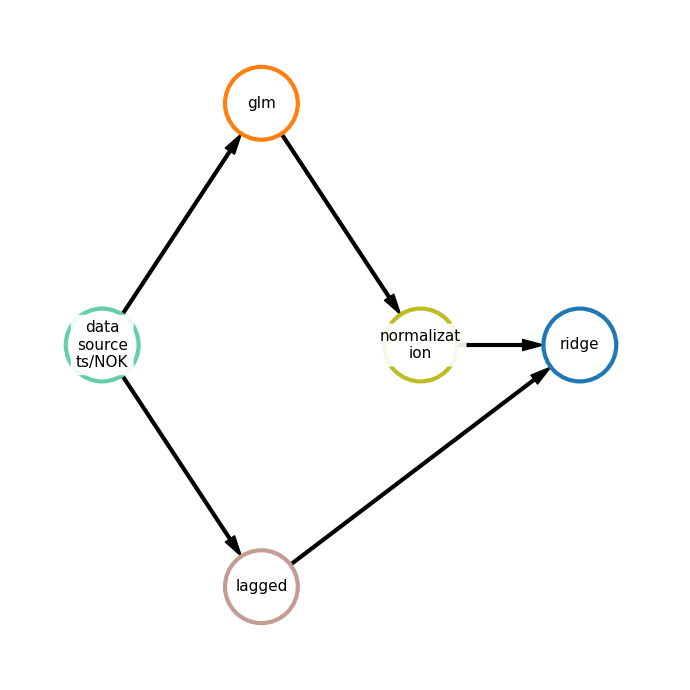

[2.08031392 2.08053839 2.08079246 2.08112642 2.08140336 2.08158933
 2.08186881 2.08216374 2.08241827 2.08266255 2.08286907 2.08307602
 2.08333183 2.08355858 2.0835113  2.08372366]
{'mae': 0.019, 'mape': 0.009}


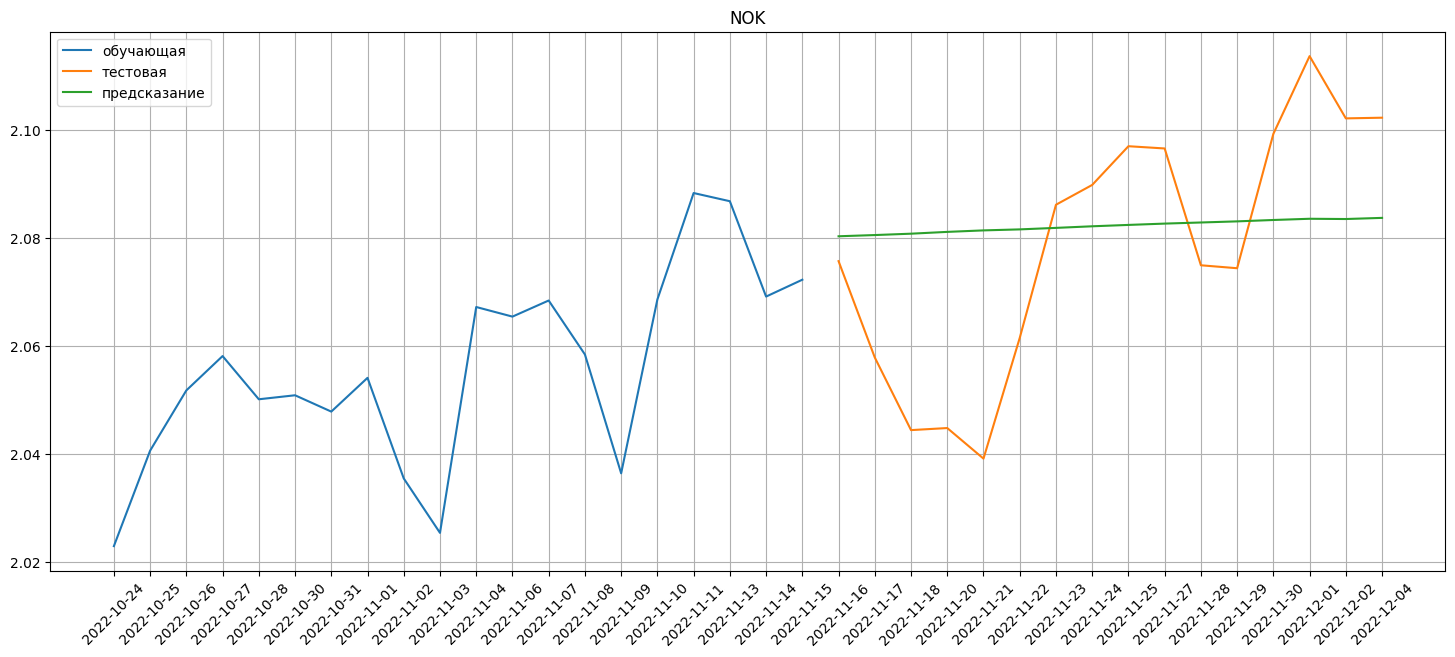

In [7]:
start_time = time.time()

while True:
    
    item = {}
    item['time'] = time.localtime()
    
    print()
    
    elapsed_time = time.time() - start_time
    
    if elapsed_time > 6*60*60:
        break
    
    target_name = random.choice(abscur_data.columns)
    print('='*40, target_name, '='*40)
    
    item['target_name'] = target_name
    
    forecast_length = random.randint(2,20)
    item['forecast_length'] = forecast_length
    
    # случайный сдвиг назад (случайная точка)
    
    delta = random.randint(0,1000-1)
    item['delta'] = delta
    
    # Сборка датасета
    
    target_train = np.ravel(abscur_data[target_name].values[:-forecast_length-delta])
    target_test = np.ravel(abscur_data[target_name].values[-forecast_length-delta:-delta])
    
    item['target_test'] = target_test

    idx_train = abscur_data.index[:-forecast_length-delta]
    idx_test = abscur_data.index[-forecast_length-delta:-delta]
    
    item['idx_test'] = list(idx_test)
    
    historical_data_inp = {}

    inp_name = target_name
    
    historical_data_inp[inp_name] = target_train
            
    # Сборка модели
    
    timeout = random.randint(1,60)
    item['timeout'] = timeout
    
    fedot = Fedot(problem='ts_forecasting',
                  task_params=TsForecastingParams(forecast_length=forecast_length),
                  timeout=timeout)
    
    # Обучение модели
    
    fedot.fit(features=historical_data_inp,
              target=historical_data_inp[target_name])
    
    # Вид сети
    
    fedot.current_pipeline.show()
    model_struct_file = target_name + '_' + str(len(history)) + '_model.png'
    fedot.current_pipeline.show(save_path=model_struct_file)
    item['model_struct_file'] = model_struct_file
    
    model_struct = fedot.current_pipeline.structure
    item['model_struct'] = model_struct
    
    # Предсказание
    
    forecast = fedot.predict(historical_data_inp,in_sample=False)
    print(forecast)
    item['forecast'] = forecast
    
    # Расчет метрик
    
    metrics = fedot.get_metrics(target_test,metric_names=['mae','mape'])
    print(metrics)
    item['metrics'] = metrics
    
    # График
    
    plt.plot(idx_train[-20:],target_train[-20:],label='обучающая')
    plt.plot(idx_test,target_test,label='тестовая')
    plt.plot(idx_test,forecast,label='предсказание')
    plt.grid()
    plt.legend()
    plt.title(target_name)
    plt.xticks(rotation=45)
    
    plot_file = target_name + '_' + str(len(history)) + '_plot.png'
    plt.savefig(plot_file)
    item['plot_file'] = plot_file
    
    plt.show()
    
    history.append(item)
    
#     break

with open("history.pickle", "wb") as file:
    pickle.dump(history, file)

# Аналитика

In [8]:
rep = pd.DataFrame()
rep['time'] = list(item['time'] for item in history)
rep['target_name'] = list(item['target_name'] for item in history)
rep['forecast_length'] = list(item['forecast_length'] for item in history)
rep['delta'] = list(item['delta'] for item in history)
rep['timeout'] = list(item['timeout'] for item in history)
rep['mape'] = list(item['metrics']['mape'] for item in history)
rep

,time,target_name,forecast_length,delta,timeout,mape
0,"(2023, 11, 5, 18, 12, 27, 6, 309, 0)",AED,10,942,1,0.004
1,"(2023, 11, 5, 18, 16, 20, 6, 309, 0)",ZAR,10,583,1,0.011
2,"(2023, 11, 5, 18, 17, 52, 6, 309, 0)",MYR,10,216,1,0.010
3,"(2023, 11, 5, 18, 19, 45, 6, 309, 0)",QAR,10,307,1,0.011
4,"(2023, 11, 5, 18, 21, 29, 6, 309, 0)",COP,10,633,1,0.106
...,...,...,...,...,...,...
105,"(2023, 11, 12, 10, 35, 55, 6, 316, 0)",BRL,20,226,51,0.014
106,"(2023, 11, 12, 11, 29, 23, 6, 316, 0)",PEN,3,411,50,0.005
107,"(2023, 11, 12, 12, 20, 25, 6, 316, 0)",TRY,16,270,35,0.014
108,"(2023, 11, 12, 12, 56, 19, 6, 316, 0)",KZT,13,679,12,0.006


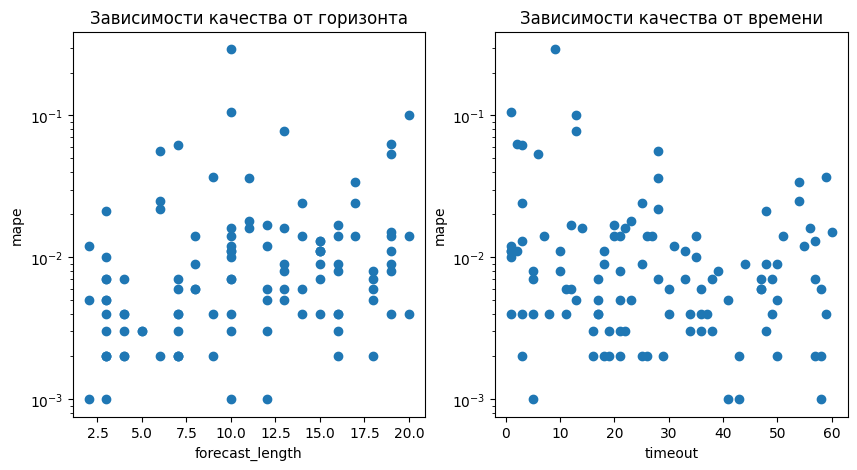

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(rep['forecast_length'],rep['mape'])
ax[0].semilogy()
ax[0].set_xlabel('forecast_length')
ax[0].set_ylabel('mape')
ax[0].set_title('Зависимости качества от горизонта')

ax[1].scatter(rep['timeout'],rep['mape'])
ax[1].semilogy()
ax[1].set_xlabel('timeout')
ax[1].set_ylabel('mape')
ax[1].set_title('Зависимости качества от времени')

plt.show()